In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset directly as it is in the current working directory
iris_data = pd.read_csv('/content/Iris (1).csv')

# Drop the 'Id' column as it's not needed for modeling
iris_data.drop('Id', axis=1, inplace=True)

# Encode the 'Species' column
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

# Split the dataset into features (X) and the target variable (y)
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Using the k-NN model as an example
knn_cv = KNeighborsClassifier(n_neighbors=3)

# 10-fold cross-validation
cv_scores = cross_val_score(knn_cv, X, y, cv=10)

print(f"CV Scores: {cv_scores}")
print(f"CV Average Score: {cv_scores.mean():.4f}")

CV Scores: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
CV Average Score: 0.9667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Compare models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(f"{name} Accuracy: {cv_scores.mean():.4f}")

k-NN Accuracy: 0.9667
Decision Tree Accuracy: 0.9533
SVM Accuracy: 0.9733
Random Forest Accuracy: 0.9600


In [ ]:
from sklearn.model_selection import GridSearchCV
!pip install numpy
import numpy as np
# Grid search for k-NN
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
knn_gs.fit(X, y)

print(f"Best parameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_:.4f}")

Best parameters: {'n_neighbors': 13}
Best score: 0.9800


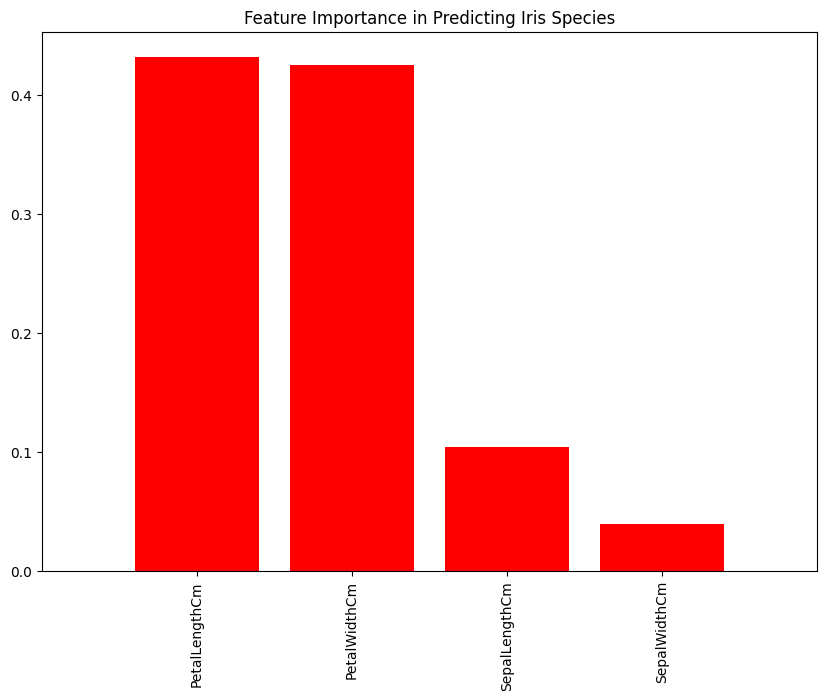

In [ ]:
import matplotlib.pyplot as plt
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Extracting feature importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Visualizing the feature importance
plt.figure(figsize=(10, 7))
plt.title('Feature Importance in Predicting Iris Species')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Identify misclassified examples
errors = y_test != y_pred
misclassified_samples = X_test[errors]

In [ ]:
import plotly.express as px

# Interactive scatter plot of sepal length vs. sepal width
fig = px.scatter(iris_data, x="SepalLengthCm", y="SepalWidthCm", color="Species", title="Sepal Length vs. Sepal Width by Species")
fig.show()